In [ ]:
# the data of the stocks of ohlc of last 3 months is present in the file /home/vishi/bolinger/cumul_ohlc.xls
# the data is in the form of DateTime	open	high	low	close	Mean	SD	BB UP Band	BB MID	BB DOWN Band
# datetime is of the form 20241231~09:16:00

import matplotlib.pyplot as plt
import numpy as np
import xlrd
list_of_period = [5,10,15,20,25,30]
list_of_k = [1,1.5,2]
period = 20
k = 2

# Read the data from the Excel file
xls_file = '/home/vishi/bolinger/cumul_ohlc.xls'
xls = xlrd.open_workbook(xls_file)
sheet = xls.sheet_by_index(0)
# Extract the data
closing_prices = []
for row in range(1, sheet.nrows):
    closing_prices.append(sheet.cell_value(row, 4))
    



In [62]:

def get_avg_std(prices, period):
    avg = np.zeros(len(prices))
    std = np.zeros(len(prices))
    for i in range(period, len(prices)):
        avg[i] = np.mean(prices[i-period:i])
        price_modified = prices[i-period:i] - avg[i]
        std[i] = np.sqrt(np.sum(price_modified**2) / (period-1))
    return avg, std
avg, std = get_avg_std(closing_prices, period)
upper_band = avg + k * std
lower_band = avg - k * std


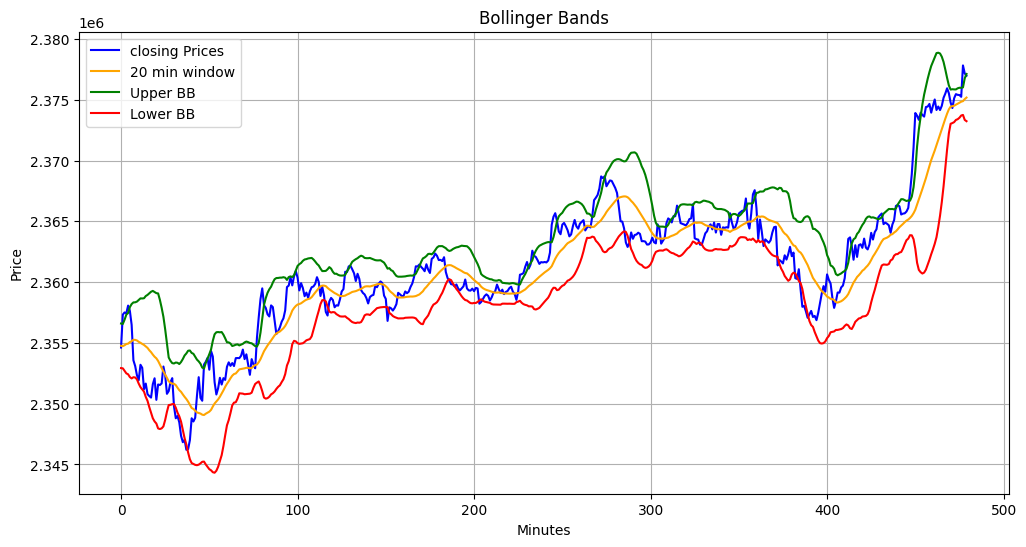

In [63]:


closing_prices_500 = closing_prices[period:500]
upper_band_500 = upper_band[period:500]
lower_band_500 = lower_band[period:500]
avg_500 = avg[period:500]

closing_prices = closing_prices[period:]
upper_band = upper_band[period:]
lower_band = lower_band[period:]
avg = avg[period:]

# closing_prices = closing_prices[period:500]
# upper_band = upper_band[period:500]
# lower_band = lower_band[period:500]
# avg = avg[period:500]




# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(closing_prices_500, label='closing Prices', color='blue')
plt.plot(avg_500, label='20 min window', color='orange')
plt.plot(upper_band_500, label='Upper BB', color='green')
plt.plot(lower_band_500, label='Lower BB', color='red')

plt.title('Bollinger Bands')
plt.xlabel('Minutes')
plt.ylabel('Price')
plt.legend()
plt.grid()
plt.show()




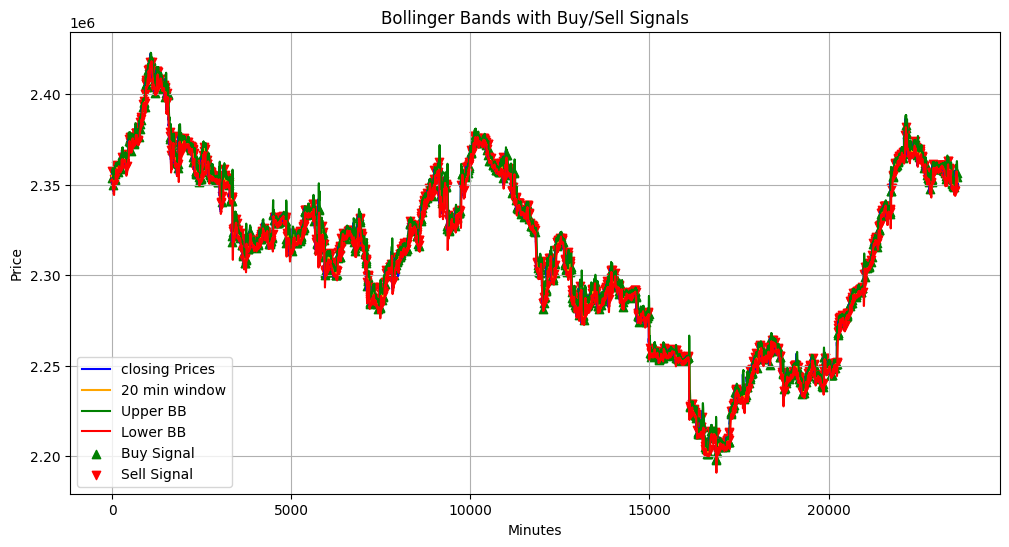

In [65]:
# when the closing price is above the upper band, it is a sell signal
# after this when ever it is below mva square it off
# when the closing price is below the lower band, it is a buy signal
# after this when ever it is above mva square it off

buy_signal = []
sell_signal = []
flag_1 = 0

for i in range(len(closing_prices)):
    if flag_1 == 0:
        if closing_prices[i] < lower_band[i] + 0.5 * std[i]:
            buy_signal.append(i)
            flag_1 = 1
        elif closing_prices[i] > upper_band[i] - 0.5 * std[i]:
            sell_signal.append(i)
            flag_1 = -1
    elif flag_1 == 1:
        if closing_prices[i] > avg[i]:
            sell_signal.append(i)
            flag_1 = 0
    elif flag_1 == -1:
        if closing_prices[i] < avg[i]:
            buy_signal.append(i)
            flag_1 = 0
# Plot the data
plt.figure(figsize=(12, 6))
plt.plot(closing_prices, label='closing Prices', color='blue')
plt.plot(avg, label='20 min window', color='orange')
plt.plot(upper_band, label='Upper BB', color='green')
plt.plot(lower_band, label='Lower BB', color='red')
# Plot buy signals
for i in buy_signal:
    plt.scatter(i, closing_prices[i], marker='^', color='green', label='Buy Signal')
# Plot sell signals
for i in sell_signal:
    plt.scatter(i, closing_prices[i], marker='v', color='red', label='Sell Signal')
plt.title('Bollinger Bands with Buy/Sell Signals')
plt.xlabel('Minutes')
plt.ylabel('Price')
# unique the labels to avoid duplicates
handles, labels = plt.gca().get_legend_handles_labels()
by_label = dict(zip(labels, handles))
plt.legend(by_label.values(), by_label.keys())
plt.grid()
plt.show()
    

Square off at 2349515.0
Profit: 48885.0


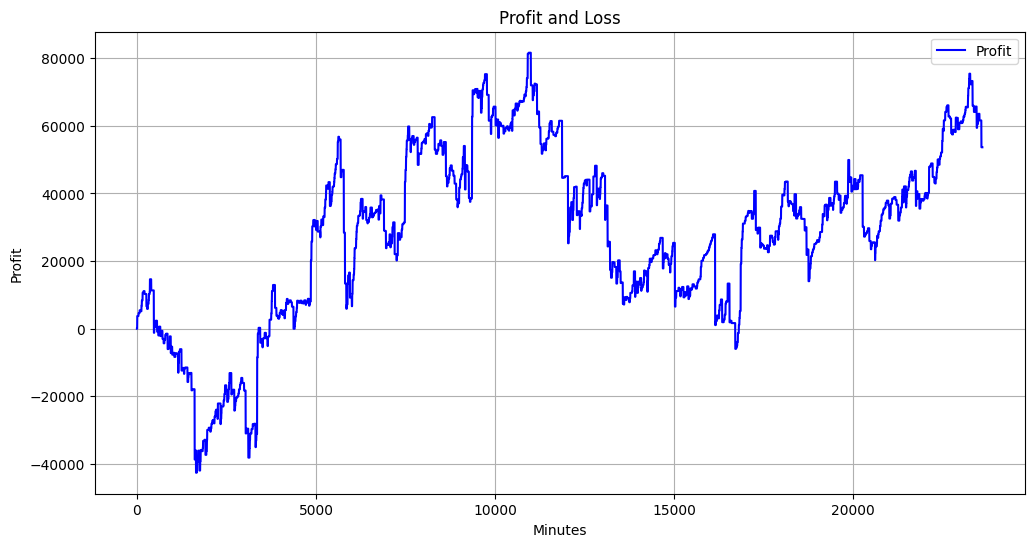

In [66]:
# flag == 0 doing nothing
# flag == 1 sold and waiting for square off
# flag == -1 buy ============||============
flag = 0
current_price = 0
list_of_profit = []
profit = 0

for i in range(len(closing_prices)):
    if flag == 0:
        if closing_prices[i] > upper_band[i]:
            flag = -1
            current_price = closing_prices[i]
            # print("Sell at", current_price)
            # print(i)
        elif closing_prices[i] < lower_band[i]:
            flag = 1
            current_price = closing_prices[i]
            # print("Buy at", current_price)
            # print(i)
    elif flag == -1:
        if closing_prices[i] < avg[i]:
            flag = 0
            profit += current_price - closing_prices[i]
            # print("Square off at", closing_prices[i])
            # print("Profit:", profit)
            # print(i)
    elif flag == 1:
        if closing_prices[i] > avg[i]:
            flag = 0
            profit += closing_prices[i] - current_price
            # print("Square off at", closing_prices[i])
            # print("Profit:", profit)
            # print(i)
    list_of_profit.append(profit)
# Print the profit and loss
if flag == -1:
    profit += current_price - closing_prices[-1]
    print("Square off at", closing_prices[-1])
elif flag == 1:
    profit += closing_prices[-1] - current_price
    print("Square off at", closing_prices[-1])

print("Profit:", profit)
# plot the profit
plt.figure(figsize=(12, 6))
plt.plot(list_of_profit, label='Profit', color='blue')
plt.title('Profit and Loss')
plt.xlabel('Minutes')
plt.ylabel('Profit')
plt.legend()
plt.grid()
plt.show()
